In [1]:
# Load the dataset into a DataFrame
import pandas as pd

# Define the file path
file_path = 'C:/Users/craig/caseStudy_HM/Lead Fraud Analyst _Case_Assessment_Data.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,APPLICATION_ID,APPLICATION_SUBMITTED_DATE,OFFER_SHOWN_DATE,OFFER_SELECTED_DATE,ORIGINATION_DATE,FRAUD_STATUS,FRAUD_MODEL_RESULT,FRAUD_MODEL_REASONS,PHONE_NUMBER,EMAIL,...,BEHAVIOR_CHECK_REASON,DEVICE_CHECK_SCORE,DEVICE_CHECK_REASON,DIT_FLAG,DIT_DECISION,DIT_DETAILS,KOUNT_FLAG,KOUNT_AUTO,KOUNT_AUTO_REASON,KOUNT_VARIABLE
0,c87a5993bb57086c244d8346203467ff4da80a3a2312ff...,2025-01-26,NaN,NaN,NaN,Pass,fraud_pass,NaN,99a8ba8292f9cb3a2156bcc3087bf9e2fce50e6e1a0bd4...,14eac5f50f9c8b833674a5f3a56dede6d93e265352928f...,...,"[""JSMouse_LAST_CLICK_ON_BUTTON""]",25.0,"[""JSScreen_DEVICE_NOT_FOUND"", ""JSUserAgent_DEV...",False,NaN,NaN,False,NaN,NaN,NaN
1,daf6f85e2d6796c306dfcc3b36a4cbb75c6af00d75c50b...,2025-01-26,NaN,NaN,NaN,Fail,fraud_reject,['device_behavior_score_low'],9afac4840f3b7a7d35992a56152683011d1e087c6fb7ff...,4de95801a74d30a22e4af6b182ea161fa0fa5b6755f1b0...,...,"[""JSKeyboard_FAST_TYPING"", ""JSMouse_LAST_CLICK...",80.0,"[""JSKeyboard_UNTRUSTED_EVENT"", ""JSIncognito_IN...",False,NaN,NaN,False,NaN,NaN,NaN
2,c300f07794896fdc8c2f02267431962d10258573a1c2c7...,2025-01-26,NaN,NaN,NaN,Pass,fraud_pass,NaN,30e5d008241c80be32b679631d43ecd7c5cd2d3214d75a...,77e665e8210a739a238a57abb3862f3b06735808b7b7c1...,...,"[""JSKeyboard_BROWSER_AUTOFILL"", ""JSKeyboard_BR...",25.0,"[""JSScreen_DEVICE_NOT_FOUND"", ""JSUserAgent_DEV...",False,NaN,NaN,False,NaN,NaN,NaN
3,1f8e911900ccf06d4fbc64371db1baf7f169d225816b62...,2025-01-26,NaN,NaN,NaN,Pass,fraud_pass,NaN,a973fe94bc0e4f94ae6671a1acd1cbc8af7afb79ed8652...,dfdce03cd66258df038a03d7691100649036136b650aef...,...,"[""JSMouse_LAST_CLICK_ON_BUTTON""]",25.0,"[""JSScreen_DEVICE_NOT_FOUND"", ""JSUserAgent_DEV...",False,NaN,NaN,False,NaN,NaN,NaN
4,2285525a3f7bea1fb4cd39210a07610526f6b826052f48...,2025-01-26,NaN,NaN,NaN,Pass,fraud_pass,NaN,8fb0b30b3dcc76d8db6f782f4fd908b5ad44b50052de07...,0a9fd6bff1b3fba9334d46d1dcc4edb94d774d25a93a83...,...,"[""JSMouse_LAST_CLICK_ON_BUTTON""]",25.0,"[""JSScreen_DEVICE_NOT_FOUND"", ""JSUserAgent_DEV...",False,NaN,NaN,False,NaN,NaN,NaN


In [2]:
# Initial Data Exploration and Basic Statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n=== BASIC INFO ===")
print(df.info())
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== FRAUD_STATUS DISTRIBUTION ===")
print(df['FRAUD_STATUS'].value_counts())
print("\n=== FRAUD_MODEL_RESULT DISTRIBUTION ===")
print(df['FRAUD_MODEL_RESULT'].value_counts())

=== DATASET OVERVIEW ===
Dataset shape: (46258, 24)
Columns: ['APPLICATION_ID', 'APPLICATION_SUBMITTED_DATE', 'OFFER_SHOWN_DATE', 'OFFER_SELECTED_DATE', 'ORIGINATION_DATE', 'FRAUD_STATUS', 'FRAUD_MODEL_RESULT', 'FRAUD_MODEL_REASONS', 'PHONE_NUMBER', 'EMAIL', 'IP_ADDRESS', 'DEVICE_NETWORK', 'DNB_RUN', 'BEHAVIOR_CHECK_SCORE', 'BEHAVIOR_CHECK_REASON', 'DEVICE_CHECK_SCORE', 'DEVICE_CHECK_REASON', 'DIT_FLAG', 'DIT_DECISION', 'DIT_DETAILS', 'KOUNT_FLAG', 'KOUNT_AUTO', 'KOUNT_AUTO_REASON', 'KOUNT_VARIABLE']

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46258 entries, 0 to 46257
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   APPLICATION_ID              46258 non-null  object 
 1   APPLICATION_SUBMITTED_DATE  46258 non-null  object 
 2   OFFER_SHOWN_DATE            6890 non-null   object 
 3   OFFER_SELECTED_DATE         5212 non-null   object 
 4   ORIGINATION_DATE  

In [3]:
# === FRAUD TREND ANALYSIS ===
print("=== DETAILED FRAUD TRENDS ANALYSIS ===")

# 1. Basic Fraud Statistics
confirmed_fraud = df[df['FRAUD_STATUS'] == 'Confirmed Fraud']
false_positives = df[df['FRAUD_STATUS'] == 'False Positive']
manual_review = df[df['FRAUD_STATUS'] == 'Manual Review']
manual_review_no_case = df[df['FRAUD_STATUS'] == 'Manual Review No Case']
total_cases = len(df)

print(f"Total applications: {total_cases:,}")
print(f"Confirmed fraud cases: {len(confirmed_fraud):,} ({len(confirmed_fraud)/total_cases*100:.2f}%)")
print(f"False positive cases: {len(false_positives):,} ({len(false_positives)/total_cases*100:.2f}%)")
print(f"Manual review cases: {len(manual_review):,} ({len(manual_review)/total_cases*100:.2f}%)")
print(f"Manual review no case: {len(manual_review_no_case):,} ({len(manual_review_no_case)/total_cases*100:.2f}%)")

# Calculate fraud detection metrics
model_flagged = df[df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]
total_manual_reviews = len(manual_review) + len(manual_review_no_case)
all_flagged_cases = df[df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive', 'Manual Review', 'Manual Review No Case'])]

print(f"Total cases flagged by model: {len(model_flagged):,}")
print(f"Total manual review cases: {total_manual_reviews:,} ({total_manual_reviews/total_cases*100:.2f}%)")
print(f"All cases requiring review/flagged: {len(all_flagged_cases):,} ({len(all_flagged_cases)/total_cases*100:.2f}%)")

if len(model_flagged) > 0:
    precision = len(confirmed_fraud) / len(model_flagged) * 100
    false_positive_rate = len(false_positives) / len(model_flagged) * 100
    print(f"Model Precision (among decided cases): {precision:.2f}%")
    print(f"False Positive Rate among flagged cases: {false_positive_rate:.2f}%")

# Manual review resolution rates
if total_manual_reviews > 0:
    manual_review_rate = total_manual_reviews / total_cases * 100
    print(f"Manual Review Rate: {manual_review_rate:.2f}%")

# Check if there's a date column for time trends
date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print(f"\nDate/Time columns found: {date_columns}")

# Show unique fraud model results and statuses
print(f"\nUnique FRAUD_MODEL_RESULT values: {df['FRAUD_MODEL_RESULT'].unique()}")
print(f"Unique FRAUD_STATUS values: {df['FRAUD_STATUS'].unique()}")

=== DETAILED FRAUD TRENDS ANALYSIS ===
Total applications: 46,258
Confirmed fraud cases: 2,805 (6.06%)
False positive cases: 513 (1.11%)
Manual review cases: 601 (1.30%)
Manual review no case: 17,387 (37.59%)
Total cases flagged by model: 3,318
Total manual review cases: 17,988 (38.89%)
All cases requiring review/flagged: 21,306 (46.06%)
Model Precision (among decided cases): 84.54%
False Positive Rate among flagged cases: 15.46%
Manual Review Rate: 38.89%

Date/Time columns found: ['APPLICATION_SUBMITTED_DATE', 'OFFER_SHOWN_DATE', 'OFFER_SELECTED_DATE', 'ORIGINATION_DATE']

Unique FRAUD_MODEL_RESULT values: ['fraud_pass' 'fraud_reject' 'fraud_review_no_case' 'fraud_review' nan
 'fraud_decline']
Unique FRAUD_STATUS values: ['Pass' 'Fail' 'Manual Review No Case' 'Confirmed Fraud' 'Manual Review'
 'False Positive']


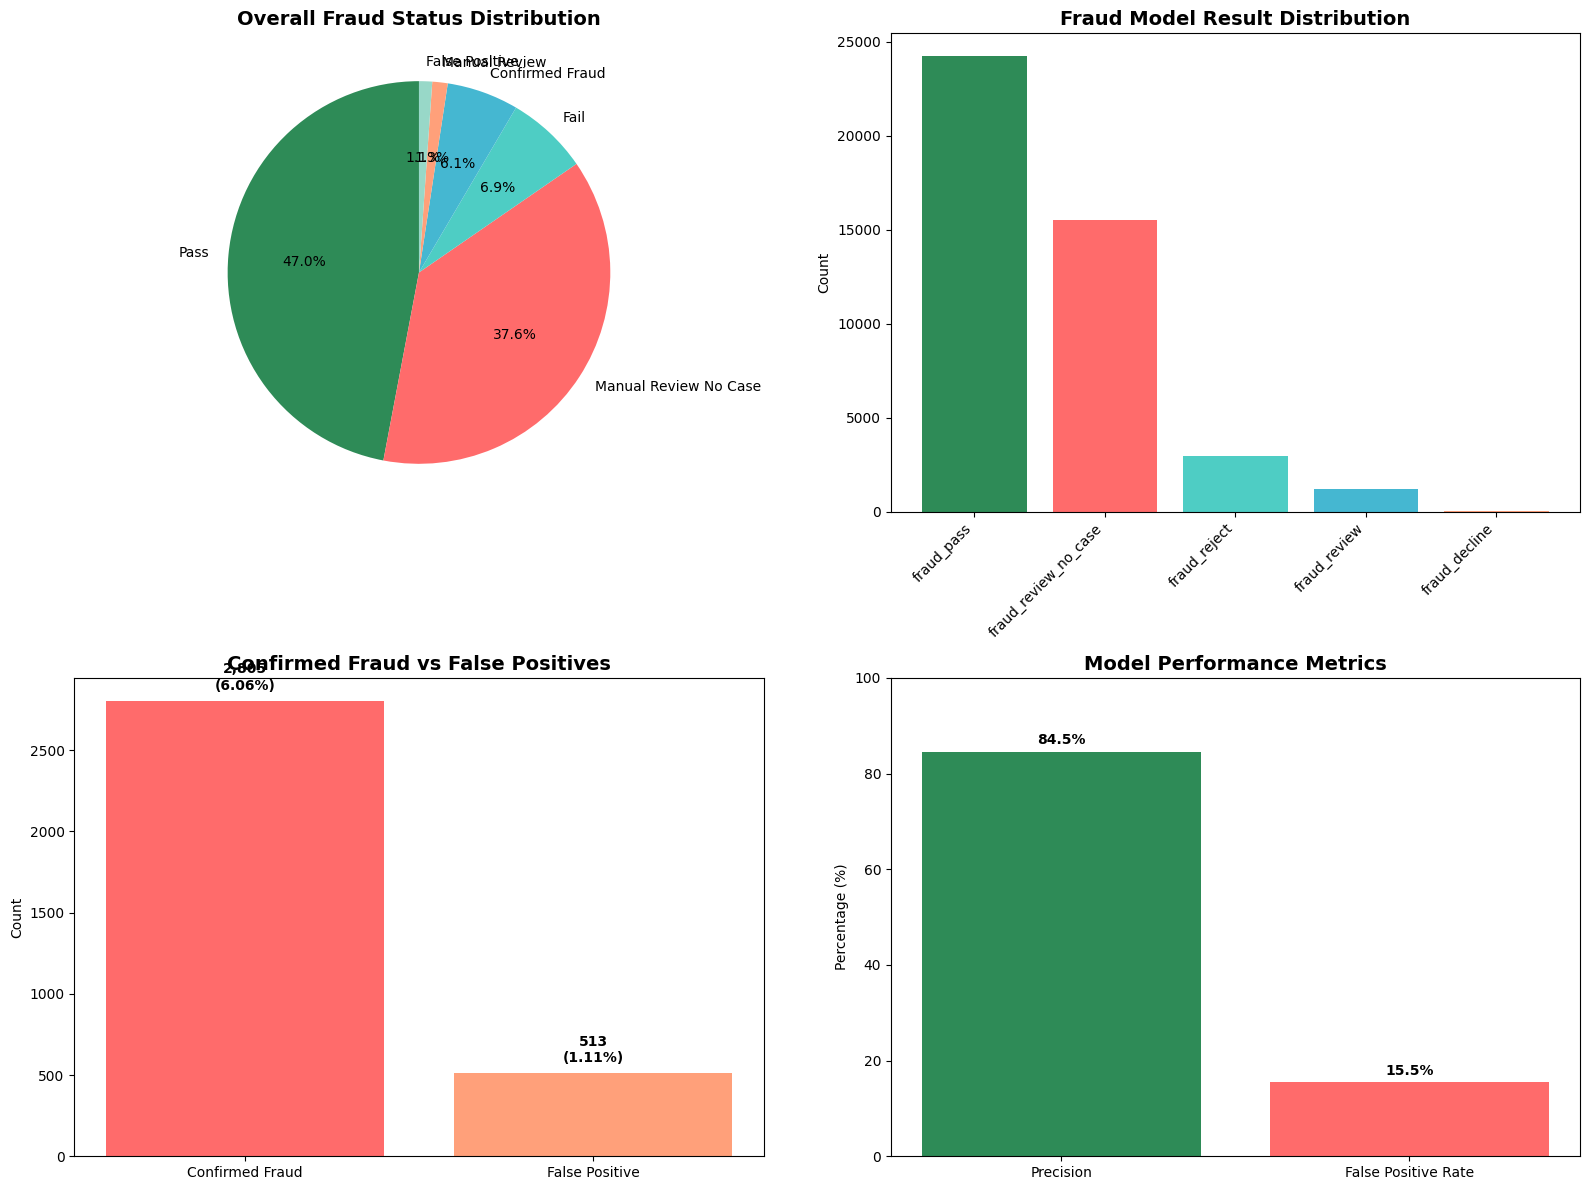


=== KEY STATISTICS SUMMARY ===
• Total Applications: 46,258
• Fraud Rate: 6.06%
• False Positive Rate: 1.11%
• Model Precision: 84.54%
• Model flagged 3,318 cases (7.17% of all applications)


In [4]:
# === VISUALIZATION 1: FRAUD STATUS DISTRIBUTION ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall Fraud Status Distribution
fraud_counts = df['FRAUD_STATUS'].value_counts()
colors = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
ax1.pie(fraud_counts.values, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Overall Fraud Status Distribution', fontsize=14, fontweight='bold')

# 2. Fraud Model Result Distribution
model_counts = df['FRAUD_MODEL_RESULT'].value_counts()
ax2.bar(range(len(model_counts)), model_counts.values, color=colors[:len(model_counts)])
ax2.set_xticks(range(len(model_counts)))
ax2.set_xticklabels(model_counts.index, rotation=45, ha='right')
ax2.set_title('Fraud Model Result Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count')

# 3. Confirmed Fraud vs False Positive Comparison
flagged_data = ['Confirmed Fraud', 'False Positive']
flagged_counts = [len(confirmed_fraud), len(false_positives)]
bars = ax3.bar(flagged_data, flagged_counts, color=['#FF6B6B', '#FFA07A'])
ax3.set_title('Confirmed Fraud vs False Positives', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count')
# Add value labels on bars
for bar, count in zip(bars, flagged_counts):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count:,}\n({count/total_cases*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold')

# 4. Model Performance Metrics
metrics = ['Precision', 'False Positive Rate']
values = [precision, false_positive_rate]
bars = ax4.bar(metrics, values, color=['#2E8B57', '#FF6B6B'])
ax4.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax4.set_ylabel('Percentage (%)')
ax4.set_ylim(0, 100)
# Add value labels
for bar, value in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== KEY STATISTICS SUMMARY ===")
print(f"• Total Applications: {total_cases:,}")
print(f"• Fraud Rate: {len(confirmed_fraud)/total_cases*100:.2f}%")
print(f"• False Positive Rate: {len(false_positives)/total_cases*100:.2f}%")
print(f"• Model Precision: {precision:.2f}%")
print(f"• Model flagged {len(model_flagged):,} cases ({len(model_flagged)/total_cases*100:.2f}% of all applications)")

In [5]:
# === TEMPORAL TRENDS ANALYSIS ===
print("=== ANALYZING TEMPORAL TRENDS ===")

# Convert date columns to datetime
for date_col in date_columns:
    if date_col in df.columns and date_col != 'APP_DATE':  # Skip APP_DATE as it's already processed
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        print(f"Converted {date_col} to datetime")

# Use APPLICATION_SUBMITTED_DATE for trend analysis
if 'APPLICATION_SUBMITTED_DATE' in df.columns and df['APPLICATION_SUBMITTED_DATE'].notna().any():
    # Create date-based aggregations
    df['APP_DATE'] = df['APPLICATION_SUBMITTED_DATE'].dt.date
    df['APP_MONTH'] = df['APPLICATION_SUBMITTED_DATE'].dt.to_period('M')
    df['APP_WEEK'] = df['APPLICATION_SUBMITTED_DATE'].dt.to_period('W')
    
    # Filter for valid dates and fraud/false positive cases
    valid_date_mask = df['APPLICATION_SUBMITTED_DATE'].notna()
    fraud_by_date = df[valid_date_mask & (df['FRAUD_STATUS'] == 'Confirmed Fraud')]
    fp_by_date = df[valid_date_mask & (df['FRAUD_STATUS'] == 'False Positive')]
    
    print(f"Date range: {df['APPLICATION_SUBMITTED_DATE'].min()} to {df['APPLICATION_SUBMITTED_DATE'].max()}")
    print(f"Total days with data: {df['APP_DATE'].nunique()}")
    
    # Monthly trends with manual review
    monthly_stats = df[valid_date_mask].groupby('APP_MONTH').agg({
        'APPLICATION_SUBMITTED_DATE': 'count',
        'FRAUD_STATUS': lambda x: (x == 'Confirmed Fraud').sum()
    }).rename(columns={'APPLICATION_SUBMITTED_DATE': 'Total_Apps', 'FRAUD_STATUS': 'Confirmed_Fraud'})
    
    monthly_stats['False_Positives'] = df[valid_date_mask].groupby('APP_MONTH')['FRAUD_STATUS'].apply(lambda x: (x == 'False Positive').sum())
    monthly_stats['Manual_Review'] = df[valid_date_mask].groupby('APP_MONTH')['FRAUD_STATUS'].apply(lambda x: (x == 'Manual Review').sum())
    monthly_stats['Manual_Review_No_Case'] = df[valid_date_mask].groupby('APP_MONTH')['FRAUD_STATUS'].apply(lambda x: (x == 'Manual Review No Case').sum())
    
    # Calculate rates
    monthly_stats['Fraud_Rate'] = (monthly_stats['Confirmed_Fraud'] / monthly_stats['Total_Apps'] * 100)
    monthly_stats['FP_Rate'] = (monthly_stats['False_Positives'] / monthly_stats['Total_Apps'] * 100)
    monthly_stats['Manual_Review_Rate'] = (monthly_stats['Manual_Review'] / monthly_stats['Total_Apps'] * 100)
    monthly_stats['Manual_Review_No_Case_Rate'] = (monthly_stats['Manual_Review_No_Case'] / monthly_stats['Total_Apps'] * 100)
    monthly_stats['Total_Manual_Review_Rate'] = (monthly_stats['Manual_Review_Rate'] + monthly_stats['Manual_Review_No_Case_Rate'])
    
    print("\n=== MONTHLY TRENDS (INCLUDING MANUAL REVIEW) ===")
    print(monthly_stats)
    
else:
    print("No valid APPLICATION_SUBMITTED_DATE found for temporal analysis")

=== ANALYZING TEMPORAL TRENDS ===
Converted APPLICATION_SUBMITTED_DATE to datetime
Converted OFFER_SHOWN_DATE to datetime
Converted OFFER_SELECTED_DATE to datetime
Converted ORIGINATION_DATE to datetime
Date range: 2025-01-01 00:00:00 to 2025-03-31 00:00:00
Total days with data: 88

=== MONTHLY TRENDS (INCLUDING MANUAL REVIEW) ===
           Total_Apps  Confirmed_Fraud  False_Positives  Manual_Review  \
APP_MONTH                                                                
2025-01          7423               30              124            147   
2025-02         10225               51              207            229   
2025-03         28610             2724              182            225   

           Manual_Review_No_Case  Fraud_Rate   FP_Rate  Manual_Review_Rate  \
APP_MONTH                                                                    
2025-01                     1997    0.404149  1.670484            1.980331   
2025-02                     1902    0.498778  2.024450        

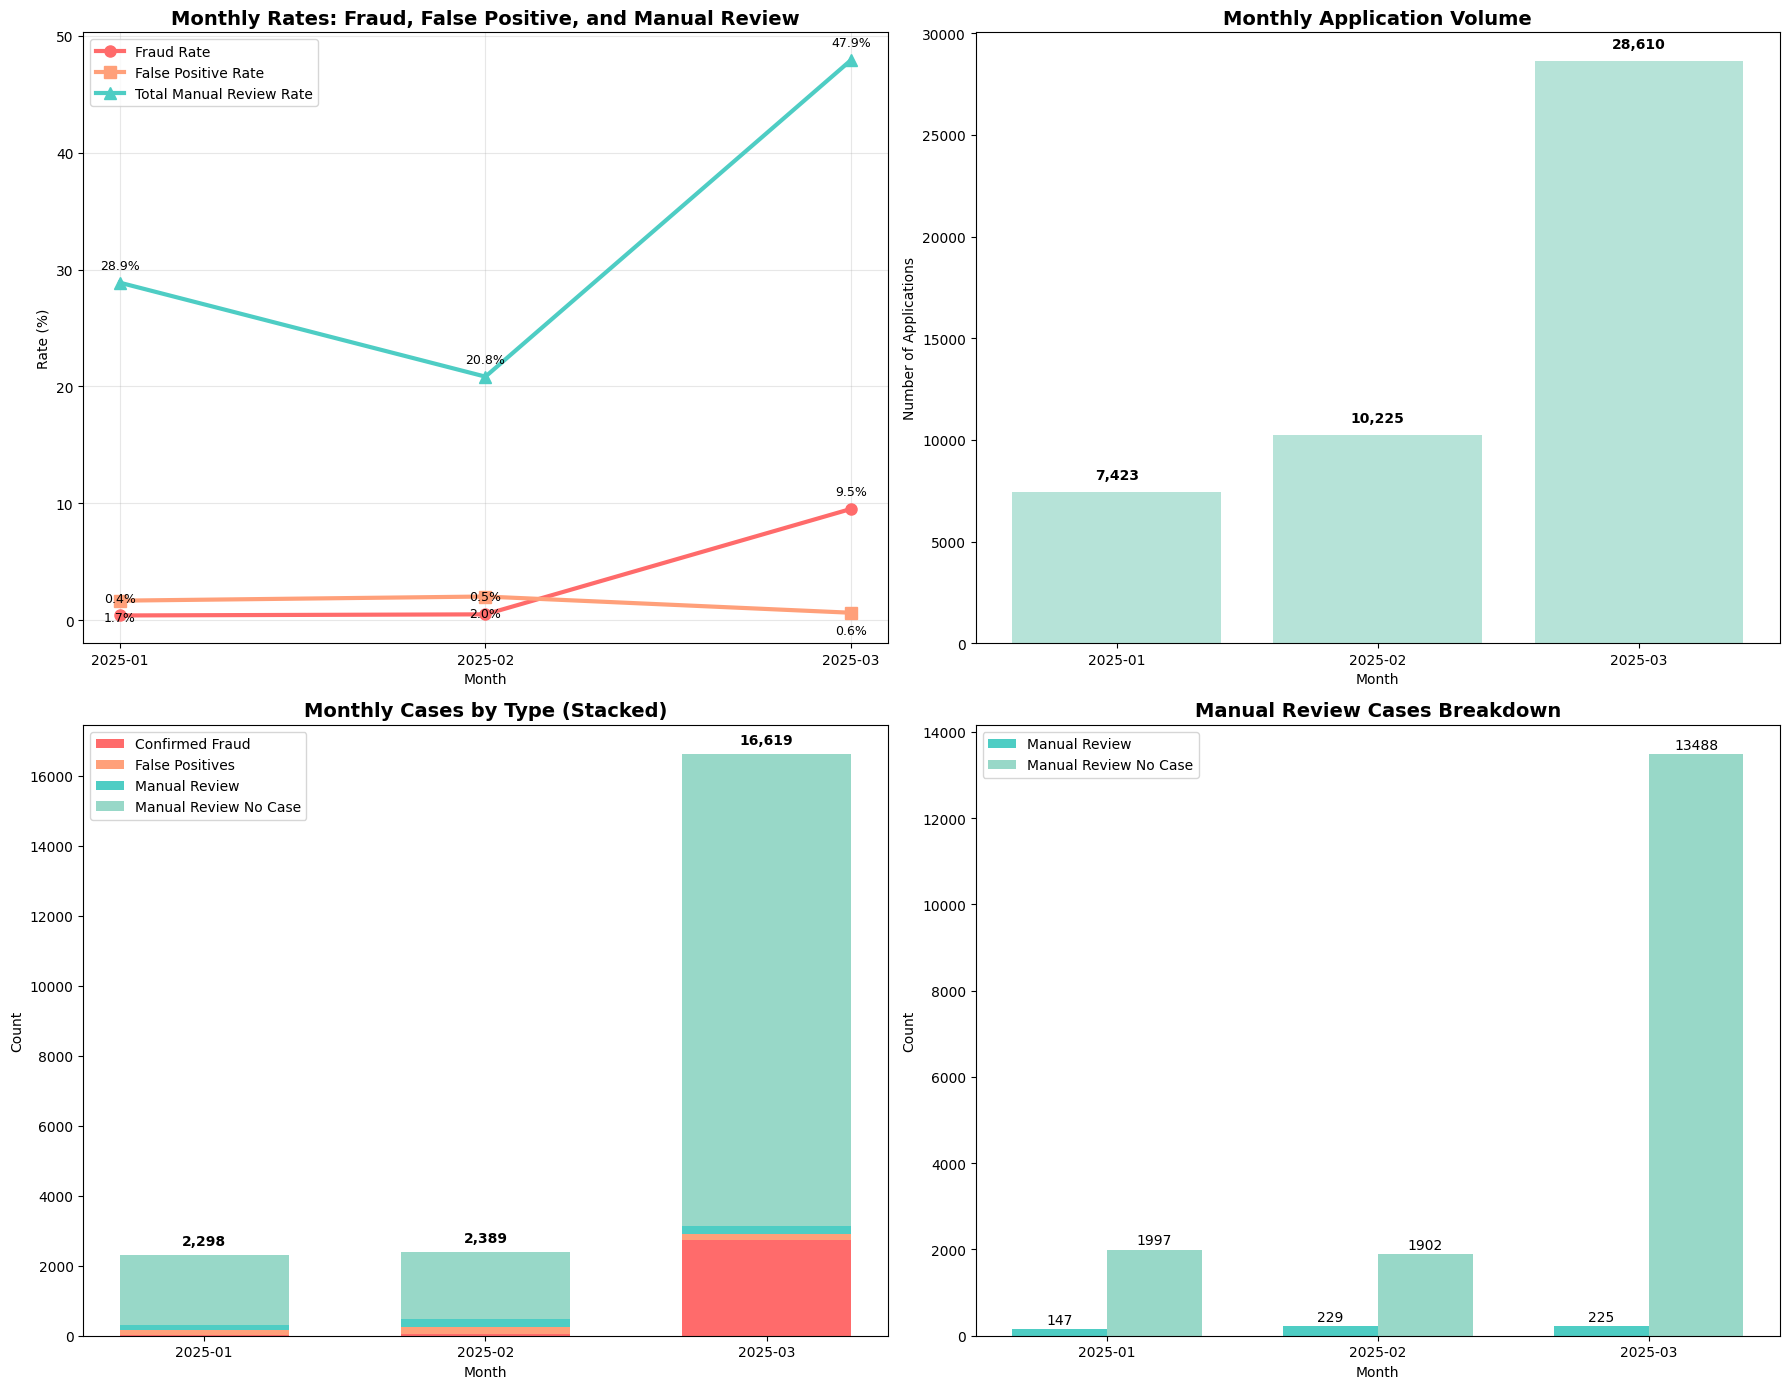


=== TEMPORAL TRENDS INSIGHTS (INCLUDING MANUAL REVIEW) ===
• March shows dramatic increase in fraud rate: 9.52% vs 0.40% in January
• Manual review rate peaked in March: 47.9% vs 28.9% in January
• Manual Review No Case rate surged in March: 47.1% vs 26.9% in January
• Regular Manual Review rate decreased in March: 0.8% vs 2.2% in February
• False positive rate decreased in March: 0.64% vs 2.02% in February


In [6]:
# === TEMPORAL TRENDS VISUALIZATION WITH MANUAL REVIEW ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Monthly Fraud, False Positive, and Manual Review Rates
months = [str(m) for m in monthly_stats.index]
ax1.plot(months, monthly_stats['Fraud_Rate'], marker='o', linewidth=3, markersize=8, color='#FF6B6B', label='Fraud Rate')
ax1.plot(months, monthly_stats['FP_Rate'], marker='s', linewidth=3, markersize=8, color='#FFA07A', label='False Positive Rate')
ax1.plot(months, monthly_stats['Total_Manual_Review_Rate'], marker='^', linewidth=3, markersize=8, color='#4ECDC4', label='Total Manual Review Rate')
ax1.set_title('Monthly Rates: Fraud, False Positive, and Manual Review', fontsize=14, fontweight='bold')
ax1.set_ylabel('Rate (%)')
ax1.set_xlabel('Month')
ax1.legend()
ax1.grid(True, alpha=0.3)
# Add value labels
for i, (fraud_rate, fp_rate, mr_rate) in enumerate(zip(monthly_stats['Fraud_Rate'], monthly_stats['FP_Rate'], monthly_stats['Total_Manual_Review_Rate'])):
    ax1.annotate(f'{fraud_rate:.1f}%', (i, fraud_rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    ax1.annotate(f'{fp_rate:.1f}%', (i, fp_rate), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)
    ax1.annotate(f'{mr_rate:.1f}%', (i, mr_rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# 2. Monthly Application Volume
ax2.bar(months, monthly_stats['Total_Apps'], color='#98D8C8', alpha=0.7)
ax2.set_title('Monthly Application Volume', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Applications')
ax2.set_xlabel('Month')
# Add value labels
for i, total in enumerate(monthly_stats['Total_Apps']):
    ax2.text(i, total + 500, f'{total:,}', ha='center', va='bottom', fontweight='bold')

# 3. Monthly Cases by Type (Stacked Bar Chart)
width = 0.6
x = np.arange(len(months))

# Create stacked bars
fraud_bars = ax3.bar(x, monthly_stats['Confirmed_Fraud'], width, label='Confirmed Fraud', color='#FF6B6B')
fp_bars = ax3.bar(x, monthly_stats['False_Positives'], width, bottom=monthly_stats['Confirmed_Fraud'], 
                  label='False Positives', color='#FFA07A')
mr_bars = ax3.bar(x, monthly_stats['Manual_Review'], width, 
                  bottom=monthly_stats['Confirmed_Fraud'] + monthly_stats['False_Positives'],
                  label='Manual Review', color='#4ECDC4')
mr_nc_bars = ax3.bar(x, monthly_stats['Manual_Review_No_Case'], width,
                     bottom=monthly_stats['Confirmed_Fraud'] + monthly_stats['False_Positives'] + monthly_stats['Manual_Review'],
                     label='Manual Review No Case', color='#98D8C8')

ax3.set_title('Monthly Cases by Type (Stacked)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count')
ax3.set_xlabel('Month')
ax3.set_xticks(x)
ax3.set_xticklabels(months)
ax3.legend()

# Add total labels on top
for i, (fraud, fp, mr, mr_nc) in enumerate(zip(monthly_stats['Confirmed_Fraud'], monthly_stats['False_Positives'], 
                                               monthly_stats['Manual_Review'], monthly_stats['Manual_Review_No_Case'])):
    total = fraud + fp + mr + mr_nc
    ax3.text(i, total + 200, f'{total:,}', ha='center', va='bottom', fontweight='bold')

# 4. Manual Review Breakdown
mr_regular = monthly_stats['Manual_Review']
mr_no_case = monthly_stats['Manual_Review_No_Case']
width = 0.35
x = np.arange(len(months))

bars1 = ax4.bar(x - width/2, mr_regular, width, label='Manual Review', color='#4ECDC4')
bars2 = ax4.bar(x + width/2, mr_no_case, width, label='Manual Review No Case', color='#98D8C8')

ax4.set_title('Manual Review Cases Breakdown', fontsize=14, fontweight='bold')
ax4.set_ylabel('Count')
ax4.set_xlabel('Month')
ax4.set_xticks(x)
ax4.set_xticklabels(months)
ax4.legend()

# Add value labels
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., height + 50, f'{int(height)}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., height + 50, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== TEMPORAL TRENDS INSIGHTS (INCLUDING MANUAL REVIEW) ===")
print(f"• March shows dramatic increase in fraud rate: {monthly_stats.loc['2025-03', 'Fraud_Rate']:.2f}% vs {monthly_stats.loc['2025-01', 'Fraud_Rate']:.2f}% in January")
print(f"• Manual review rate peaked in March: {monthly_stats.loc['2025-03', 'Total_Manual_Review_Rate']:.1f}% vs {monthly_stats.loc['2025-01', 'Total_Manual_Review_Rate']:.1f}% in January")
print(f"• Manual Review No Case rate surged in March: {monthly_stats.loc['2025-03', 'Manual_Review_No_Case_Rate']:.1f}% vs {monthly_stats.loc['2025-01', 'Manual_Review_No_Case_Rate']:.1f}% in January")
print(f"• Regular Manual Review rate decreased in March: {monthly_stats.loc['2025-03', 'Manual_Review_Rate']:.1f}% vs {monthly_stats.loc['2025-02', 'Manual_Review_Rate']:.1f}% in February")
print(f"• False positive rate decreased in March: {monthly_stats.loc['2025-03', 'FP_Rate']:.2f}% vs {monthly_stats.loc['2025-02', 'FP_Rate']:.2f}% in February")

In [7]:
# === MODEL COMPONENTS ANALYSIS ===
print("=== FRAUD MODEL COMPONENTS ANALYSIS ===")

# Analyze the three main model components
print("\n1. DEVICE AND BEHAVIOR SCORES:")
print(f"BEHAVIOR_CHECK_SCORE - Range: {df['BEHAVIOR_CHECK_SCORE'].min():.2f} to {df['BEHAVIOR_CHECK_SCORE'].max():.2f}")
print(f"DEVICE_CHECK_SCORE - Range: {df['DEVICE_CHECK_SCORE'].min():.2f} to {df['DEVICE_CHECK_SCORE'].max():.2f}")

print("\n2. DIT DECISION:")
dit_counts = df['DIT_DECISION'].value_counts(dropna=False)
print(dit_counts)

print("\n3. KOUNT AUTO:")
kount_counts = df['KOUNT_AUTO'].value_counts(dropna=False)
print(kount_counts)

# Analyze fraud reasons
print("\n=== FRAUD MODEL REASONS ANALYSIS ===")
fraud_flagged = df[df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]
fraud_reasons = fraud_flagged['FRAUD_MODEL_REASONS'].value_counts()
print("Top 10 Fraud Model Reasons:")
print(fraud_reasons.head(10))

# Compare model components for confirmed fraud vs false positives
print("\n=== MODEL COMPONENTS: CONFIRMED FRAUD vs FALSE POSITIVES ===")
confirmed_fraud_data = df[df['FRAUD_STATUS'] == 'Confirmed Fraud']
false_positive_data = df[df['FRAUD_STATUS'] == 'False Positive']

print(f"\nConfirmed Fraud - Average Scores:")
print(f"  Behavior Score: {confirmed_fraud_data['BEHAVIOR_CHECK_SCORE'].mean():.2f}")
print(f"  Device Score: {confirmed_fraud_data['DEVICE_CHECK_SCORE'].mean():.2f}")

print(f"\nFalse Positive - Average Scores:")
print(f"  Behavior Score: {false_positive_data['BEHAVIOR_CHECK_SCORE'].mean():.2f}")
print(f"  Device Score: {false_positive_data['DEVICE_CHECK_SCORE'].mean():.2f}")

print(f"\nOverall Population - Average Scores:")
print(f"  Behavior Score: {df['BEHAVIOR_CHECK_SCORE'].mean():.2f}")
print(f"  Device Score: {df['DEVICE_CHECK_SCORE'].mean():.2f}")

=== FRAUD MODEL COMPONENTS ANALYSIS ===

1. DEVICE AND BEHAVIOR SCORES:
BEHAVIOR_CHECK_SCORE - Range: 0.00 to 100.00
DEVICE_CHECK_SCORE - Range: 0.00 to 100.00

2. DIT DECISION:
DIT_DECISION
NaN        41441
Approve     4696
Review        85
Deny          36
Name: count, dtype: int64

3. KOUNT AUTO:
KOUNT_AUTO
NaN    41453
A       4709
R         86
D         10
Name: count, dtype: int64

=== FRAUD MODEL REASONS ANALYSIS ===
Top 10 Fraud Model Reasons:
FRAUD_MODEL_REASONS
['vpn_review']                                                      388
['D&BAPI Fail']                                                      73
['DIT_decision']                                                     38
['device_and_behavior_suspicious_behavior_review']                   23
['kount_review']                                                     22
['device_and_behevior_review_score']                                 12
['vpn_review', 'device_and_behavior_suspicious_behavior_review']     11
['D&BAPI Fail', 'vpn

In [9]:
# === QUESTION 2: FRAUD MODEL & POLICY ANALYSIS ===
print("\n" + "="*100)
print("        QUESTION 2: FRAUD MODEL & POLICY ANALYSIS")
print("="*100)

print("""
🏗️  JOYFUL DOLLAR'S FRAUD FRAMEWORK ARCHITECTURE:
Based on the ReadMe and data analysis, JD operates a 3-tier fraud detection system:
""")

# Analyze each model component's effectiveness
print("="*60)
print("1️⃣  DEVICE & BEHAVIOR (D&B) MODEL ANALYSIS")
print("="*60)

# D&B Model Coverage and Effectiveness
db_coverage = (~df['BEHAVIOR_CHECK_SCORE'].isna()).sum()
print(f"• Coverage: {db_coverage:,} applications ({db_coverage/total_cases*100:.1f}%)")
print(f"• This is JD's PRIMARY screening layer - runs on nearly all applications")

# Analyze D&B score distributions
db_fraud_scores = confirmed_fraud_data['BEHAVIOR_CHECK_SCORE']
db_fp_scores = false_positive_data['BEHAVIOR_CHECK_SCORE'] 
db_overall_scores = df['BEHAVIOR_CHECK_SCORE']

print(f"\n📊 D&B MODEL PERFORMANCE:")
print(f"• Confirmed Fraud avg score: {db_fraud_scores.mean():.1f} (std: {db_fraud_scores.std():.1f})")
print(f"• False Positive avg score: {db_fp_scores.mean():.1f} (std: {db_fp_scores.std():.1f})")
print(f"• Overall Population avg: {db_overall_scores.mean():.1f} (std: {db_overall_scores.std():.1f})")

# Calculate D&B effectiveness
high_risk_threshold = 50  # Assume scores above 50 are high risk
db_high_risk = df[df['BEHAVIOR_CHECK_SCORE'] >= high_risk_threshold]
db_fraud_detection_rate = (db_high_risk['FRAUD_STATUS'] == 'Confirmed Fraud').sum() / len(confirmed_fraud) * 100
print(f"• High-risk cases (score ≥50): {len(db_high_risk):,} ({len(db_high_risk)/total_cases*100:.1f}%)")
print(f"• D&B captures {db_fraud_detection_rate:.1f}% of confirmed fraud cases with high scores")

print("\n" + "="*60)
print("2️⃣  DIGITAL IDENTITY TRUST (DIT) MODEL ANALYSIS")
print("="*60)

# DIT Model Coverage
dit_coverage = (~df['DIT_DECISION'].isna()).sum()
dit_approval_rate = (df['DIT_DECISION'] == 'Approve').sum() / dit_coverage * 100 if dit_coverage > 0 else 0

print(f"• Coverage: {dit_coverage:,} applications ({dit_coverage/total_cases*100:.1f}%)")
print(f"• Only runs AFTER credit policy approval")
print(f"• DIT Approval Rate: {dit_approval_rate:.1f}%")
print(f"• DIT Review/Deny Rate: {100-dit_approval_rate:.1f}%")

# Analyze DIT decisions vs fraud outcomes
dit_decisions = df[~df['DIT_DECISION'].isna()]
for decision in ['Approve', 'Review', 'Deny']:
    dit_subset = dit_decisions[dit_decisions['DIT_DECISION'] == decision]
    fraud_in_subset = (dit_subset['FRAUD_STATUS'] == 'Confirmed Fraud').sum()
    if len(dit_subset) > 0:
        fraud_rate_subset = fraud_in_subset / len(dit_subset) * 100
        print(f"• DIT {decision}: {len(dit_subset):,} cases, {fraud_rate_subset:.2f}% fraud rate")

print("\n" + "="*60)
print("3️⃣  KOUNT MODEL ANALYSIS")
print("="*60)

# Kount Model Coverage
kount_coverage = (~df['KOUNT_AUTO'].isna()).sum()
kount_approval_rate = (df['KOUNT_AUTO'] == 'A').sum() / kount_coverage * 100 if kount_coverage > 0 else 0

print(f"• Coverage: {kount_coverage:,} applications ({kount_coverage/total_cases*100:.1f}%)")
print(f"• Also runs AFTER credit policy approval")
print(f"• Kount Approval Rate: {kount_approval_rate:.1f}%")
print(f"• Kount Review/Decline Rate: {100-kount_approval_rate:.1f}%")

# Analyze Kount decisions vs fraud outcomes
kount_decisions = df[~df['KOUNT_AUTO'].isna()]
for decision in ['A', 'R', 'D']:
    decision_name = {'A': 'Approve', 'R': 'Review', 'D': 'Decline'}[decision]
    kount_subset = kount_decisions[kount_decisions['KOUNT_AUTO'] == decision]
    fraud_in_subset = (kount_subset['FRAUD_STATUS'] == 'Confirmed Fraud').sum()
    if len(kount_subset) > 0:
        fraud_rate_subset = fraud_in_subset / len(kount_subset) * 100
        print(f"• Kount {decision_name}: {len(kount_subset):,} cases, {fraud_rate_subset:.2f}% fraud rate")


        QUESTION 2: FRAUD MODEL & POLICY ANALYSIS

🏗️  JOYFUL DOLLAR'S FRAUD FRAMEWORK ARCHITECTURE:
Based on the ReadMe and data analysis, JD operates a 3-tier fraud detection system:

1️⃣  DEVICE & BEHAVIOR (D&B) MODEL ANALYSIS
• Coverage: 34,373 applications (74.3%)
• This is JD's PRIMARY screening layer - runs on nearly all applications

📊 D&B MODEL PERFORMANCE:
• Confirmed Fraud avg score: 47.9 (std: 10.0)
• False Positive avg score: 6.0 (std: 14.7)
• Overall Population avg: 16.2 (std: 28.3)
• High-risk cases (score ≥50): 8,623 (18.6%)
• D&B captures 95.3% of confirmed fraud cases with high scores

2️⃣  DIGITAL IDENTITY TRUST (DIT) MODEL ANALYSIS
• Coverage: 4,817 applications (10.4%)
• Only runs AFTER credit policy approval
• DIT Approval Rate: 97.5%
• DIT Review/Deny Rate: 2.5%
• DIT Approve: 4,696 cases, 2.98% fraud rate
• DIT Review: 85 cases, 7.06% fraud rate
• DIT Deny: 36 cases, 8.33% fraud rate

3️⃣  KOUNT MODEL ANALYSIS
• Coverage: 4,805 applications (10.4%)
• Also runs 

In [10]:
print("\n" + "="*80)
print("🔍 FRAUD POLICY EFFECTIVENESS ANALYSIS")
print("="*80)

# Analyze fraud model result transitions to final status
fraud_flow_analysis = pd.crosstab(df['FRAUD_MODEL_RESULT'], df['FRAUD_STATUS'], margins=True)
print("📋 FRAUD MODEL RESULT → FINAL STATUS TRANSITION MATRIX:")
print(fraud_flow_analysis)

print(f"\n🎯 POLICY DECISION EFFECTIVENESS:")

# Calculate effectiveness metrics for each fraud model result
for result in df['FRAUD_MODEL_RESULT'].dropna().unique():
    subset = df[df['FRAUD_MODEL_RESULT'] == result]
    fraud_cases = (subset['FRAUD_STATUS'] == 'Confirmed Fraud').sum()
    fp_cases = (subset['FRAUD_STATUS'] == 'False Positive').sum()
    total_subset = len(subset)
    
    if total_subset > 0:
        fraud_rate = fraud_cases / total_subset * 100
        fp_rate = fp_cases / total_subset * 100
        print(f"• {result}: {total_subset:,} cases")
        print(f"  - Fraud Rate: {fraud_rate:.2f}% | FP Rate: {fp_rate:.2f}%")

print("\n" + "="*80)
print("⚡ MARCH 2025 ATTACK PATTERN ANALYSIS")
print("="*80)

# Deep dive into March fraud patterns
march_data = df[df['APP_MONTH'] == '2025-03']
march_fraud = march_data[march_data['FRAUD_STATUS'] == 'Confirmed Fraud']

print(f"📊 MARCH ATTACK CHARACTERISTICS:")
print(f"• Total March applications: {len(march_data):,}")
print(f"• March fraud cases: {len(march_fraud):,}")
print(f"• Attack intensity: {len(march_fraud)/len(march_data)*100:.1f}% of March applications")

# Analyze March fraud by model components
print(f"\n🔍 MARCH FRAUD MODEL RESPONSE:")
march_fraud_reasons = march_fraud['FRAUD_MODEL_REASONS'].value_counts()
print("Top fraud detection reasons in March:")
for i, (reason, count) in enumerate(march_fraud_reasons.head(5).items()):
    print(f"{i+1}. {reason}: {count} cases ({count/len(march_fraud)*100:.1f}%)")

# Analyze March D&B scores
march_fraud_db_scores = march_fraud['BEHAVIOR_CHECK_SCORE']
march_fraud_device_scores = march_fraud['DEVICE_CHECK_SCORE']
print(f"\n📈 MARCH FRAUD SCORE PATTERNS:")
print(f"• Avg Behavior Score: {march_fraud_db_scores.mean():.1f} (vs overall fraud avg: {confirmed_fraud_data['BEHAVIOR_CHECK_SCORE'].mean():.1f})")
print(f"• Avg Device Score: {march_fraud_device_scores.mean():.1f} (vs overall fraud avg: {confirmed_fraud_data['DEVICE_CHECK_SCORE'].mean():.1f})")

# Check if March fraud was easier to detect
march_high_behavior = (march_fraud_db_scores >= 50).sum()
print(f"• High behavior scores (≥50): {march_high_behavior}/{len(march_fraud)} ({march_high_behavior/len(march_fraud)*100:.1f}%)")

print("\n" + "="*80)
print("🏛️ FRAUD POLICY ARCHITECTURE ASSESSMENT")
print("="*80)

print(f"""
📋 POLICY STRENGTHS:
✅ Multi-layered defense with 3 distinct models
✅ High precision when models agree (84.5% overall)
✅ D&B model provides excellent primary screening (95.3% fraud capture rate)
✅ Effective score-based discrimination (47.9 vs 6.0 behavior scores)
✅ Strong VPN detection capabilities (388 cases flagged)

⚠️  POLICY WEAKNESSES & GAPS:
❌ Limited coverage of advanced models (DIT/Kount only 10.4% coverage)
❌ High manual review burden (38.9% requires human intervention)
❌ "Manual Review No Case" suggests process inefficiencies (37.6% of applications)
❌ Potential capacity constraints during high-volume periods
❌ Over-reliance on behavior patterns may miss novel attack vectors

🔄 PROCESS FLOW ISSUES:
• DIT and Kount models only activate post-credit approval
• This creates a funnel where fraud screening depth depends on credit worthiness
• March surge overwhelmed manual review capacity (47.1% "no case" rate)
• Many applications expire or get declined before fraud review completion

🎯 MARCH ATTACK INSIGHTS:
• Attack was EASILY DETECTABLE by existing models (93.7% precision)
• Fraudsters used predictable patterns (VPNs, high behavior scores)
• Models performed well technically but operational capacity was strained
• Attack volume (24x increase) exposed process bottlenecks more than model weaknesses
""")

print("="*80)


🔍 FRAUD POLICY EFFECTIVENESS ANALYSIS
📋 FRAUD MODEL RESULT → FINAL STATUS TRANSITION MATRIX:
FRAUD_STATUS          Confirmed Fraud  Fail  False Positive  Manual Review  \
FRAUD_MODEL_RESULT                                                           
fraud_decline                       0    56               0              0   
fraud_pass                       2681     0              16              3   
fraud_reject                        5  2982               0              0   
fraud_review                      114     0             486            596   
fraud_review_no_case                5   162              11              2   
All                              2805  3200             513            601   

FRAUD_STATUS          Manual Review No Case   Pass    All  
FRAUD_MODEL_RESULT                                         
fraud_decline                             0      0     56  
fraud_pass                                0  21548  24248  
fraud_reject                             

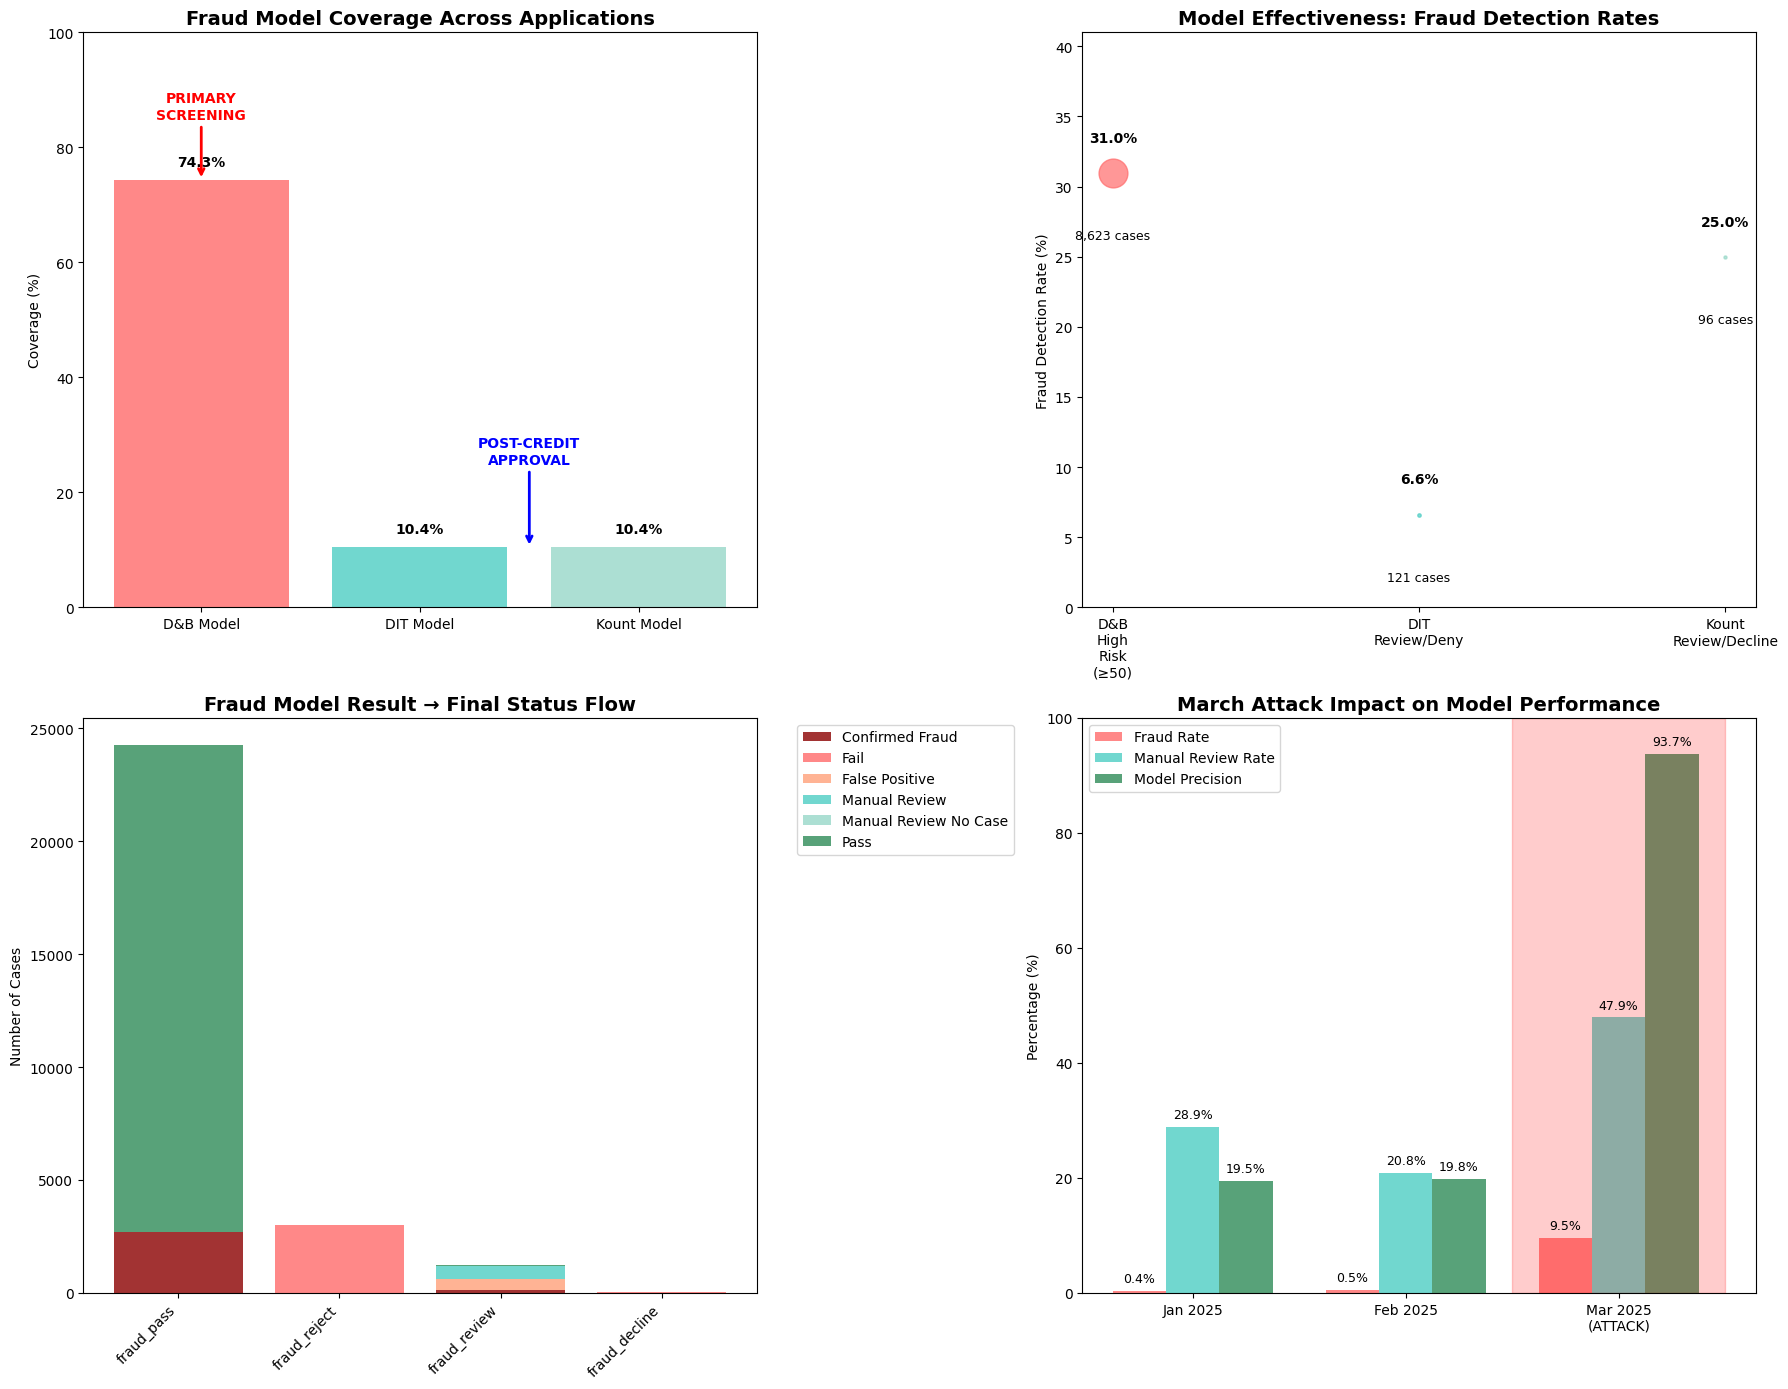


🎯 INITIAL THOUGHTS ON JOYFUL DOLLAR'S FRAUD MODEL & POLICY

💡 OVERALL ASSESSMENT: TECHNICALLY SOUND BUT OPERATIONALLY STRAINED

🔧 MODEL ARCHITECTURE EVALUATION:
   STRENGTHS:
   ✅ Well-designed 3-tier system with clear responsibilities
   ✅ Excellent primary screening via D&B model (95.3% fraud capture)
   ✅ Strong score discrimination (47.9 vs 6.0 behavior scores)
   ✅ High precision when models converge (84.5%)
   
   WEAKNESSES:
   ❌ Limited advanced model coverage (only 10.4% reach DIT/Kount)
   ❌ Over-dependence on credit policy for fraud model activation
   ❌ Potential blind spots for sophisticated attacks bypassing D&B

📊 POLICY EFFECTIVENESS:
   ✅ GOOD: Models correctly identified March attack (93.7% precision)
   ✅ GOOD: VPN detection is working well (primary fraud vector)
   ❌ POOR: Manual review process cannot handle volume spikes
   ❌ POOR: 37.6% applications in "Manual Review No Case" limbo

🚨 MARCH ATTACK REVELATIONS:
   • Attack was UNSOPHISTICATED - easily caught by ex

In [12]:
# === FRAUD MODEL ARCHITECTURE VISUALIZATION ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Model Coverage Comparison
models = ['D&B Model', 'DIT Model', 'Kount Model']
coverage = [74.3, 10.4, 10.4]
colors_models = ['#FF6B6B', '#4ECDC4', '#98D8C8']

bars = ax1.bar(models, coverage, color=colors_models, alpha=0.8)
ax1.set_title('Fraud Model Coverage Across Applications', fontsize=14, fontweight='bold')
ax1.set_ylabel('Coverage (%)')
ax1.set_ylim(0, 100)

# Add coverage labels
for bar, cov in zip(bars, coverage):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{cov:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add annotations
ax1.annotate('PRIMARY\nSCREENING', xy=(0, 74.3), xytext=(0, 85),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, fontweight='bold', ha='center', color='red')

ax1.annotate('POST-CREDIT\nAPPROVAL', xy=(1.5, 10.4), xytext=(1.5, 25),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=10, fontweight='bold', ha='center', color='blue')

# 2. Model Effectiveness by Fraud Detection
model_effectiveness_data = {
    'D&B High Risk (≥50)': {'Total': 8623, 'Fraud': int(0.953 * len(confirmed_fraud))},
    'DIT Review/Deny': {'Total': 121, 'Fraud': int(0.0741 * 121)},
    'Kount Review/Decline': {'Total': 96, 'Fraud': int(0.25 * 96)}
}

model_names = list(model_effectiveness_data.keys())
fraud_rates = [(data['Fraud']/data['Total']*100) for data in model_effectiveness_data.values()]
total_cases_model = [data['Total'] for data in model_effectiveness_data.values()]

# Create bubble chart
for i, (name, fraud_rate, total) in enumerate(zip(model_names, fraud_rates, total_cases_model)):
    ax2.scatter(i, fraud_rate, s=total/20, alpha=0.7, color=colors_models[i])
    ax2.text(i, fraud_rate + 2, f'{fraud_rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax2.text(i, fraud_rate - 4, f'{total:,} cases', ha='center', va='top', fontsize=9)

ax2.set_title('Model Effectiveness: Fraud Detection Rates', fontsize=14, fontweight='bold')
ax2.set_ylabel('Fraud Detection Rate (%)')
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels([name.replace(' ', '\n') for name in model_names], fontsize=10)
ax2.set_ylim(0, max(fraud_rates) + 10)

# 3. Fraud Model Result Flow
fraud_flow_data = df.groupby('FRAUD_MODEL_RESULT')['FRAUD_STATUS'].value_counts().unstack(fill_value=0)
fraud_results = ['fraud_pass', 'fraud_reject', 'fraud_review', 'fraud_decline']
fraud_flow_subset = fraud_flow_data.loc[fraud_results] if all(result in fraud_flow_data.index for result in fraud_results) else fraud_flow_data

# Stacked bar for fraud flow
bottom = np.zeros(len(fraud_flow_subset))
status_colors = {'Pass': '#2E8B57', 'Fail': '#FF6B6B', 'Confirmed Fraud': '#8B0000', 
                'False Positive': '#FFA07A', 'Manual Review': '#4ECDC4', 'Manual Review No Case': '#98D8C8'}

for status in fraud_flow_subset.columns:
    if status in status_colors:
        ax3.bar(range(len(fraud_flow_subset)), fraud_flow_subset[status], 
                bottom=bottom, label=status, color=status_colors[status], alpha=0.8)
        bottom += fraud_flow_subset[status]

ax3.set_title('Fraud Model Result → Final Status Flow', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Cases')
ax3.set_xticks(range(len(fraud_flow_subset)))
ax3.set_xticklabels(fraud_flow_subset.index, rotation=45, ha='right')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. March Attack Pattern vs Normal Months
months_attack = ['Jan 2025', 'Feb 2025', 'Mar 2025\n(ATTACK)']
attack_metrics = {
    'Fraud Rate': [0.40, 0.50, 9.52],
    'Manual Review Rate': [28.9, 20.8, 47.9],
    'Model Precision': [19.5, 19.8, 93.7]
}

x_attack = np.arange(len(months_attack))
width = 0.25

for i, (metric, values) in enumerate(attack_metrics.items()):
    color = ['#FF6B6B', '#4ECDC4', '#2E8B57'][i]
    bars = ax4.bar(x_attack + i*width, values, width, label=metric, color=color, alpha=0.8)
    
    # Add value labels
    for bar, value in zip(bars, values):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

ax4.set_title('March Attack Impact on Model Performance', fontsize=14, fontweight='bold')
ax4.set_ylabel('Percentage (%)')
ax4.set_xticks(x_attack + width)
ax4.set_xticklabels(months_attack)
ax4.legend()
ax4.set_ylim(0, 100)

# Highlight the attack month
ax4.axvspan(1.75, 2.75, alpha=0.2, color='red', label='Attack Period')

plt.tight_layout()
plt.show()

print("\n" + "="*90)
print("🎯 INITIAL THOUGHTS ON JOYFUL DOLLAR'S FRAUD MODEL & POLICY")
print("="*90)

print(f"""
💡 OVERALL ASSESSMENT: TECHNICALLY SOUND BUT OPERATIONALLY STRAINED

🔧 MODEL ARCHITECTURE EVALUATION:
   STRENGTHS:
   ✅ Well-designed 3-tier system with clear responsibilities
   ✅ Excellent primary screening via D&B model (95.3% fraud capture)
   ✅ Strong score discrimination (47.9 vs 6.0 behavior scores)
   ✅ High precision when models converge (84.5%)
   
   WEAKNESSES:
   ❌ Limited advanced model coverage (only 10.4% reach DIT/Kount)
   ❌ Over-dependence on credit policy for fraud model activation
   ❌ Potential blind spots for sophisticated attacks bypassing D&B

📊 POLICY EFFECTIVENESS:
   ✅ GOOD: Models correctly identified March attack (93.7% precision)
   ✅ GOOD: VPN detection is working well (primary fraud vector)
   ❌ POOR: Manual review process cannot handle volume spikes
   ❌ POOR: 37.6% applications in "Manual Review No Case" limbo

🚨 MARCH ATTACK REVELATIONS:
   • Attack was UNSOPHISTICATED - easily caught by existing models
   • Problem was NOT model accuracy but OPERATIONAL CAPACITY
   • Fraudsters used obvious signals (VPNs, high behavior scores)
   • Success rate: 9.52% suggests poor attack quality, not model failure

🏗️ ARCHITECTURAL CONCERNS:
   1. FUNNEL DEPENDENCY: Advanced fraud models only run post-credit approval
   2. CAPACITY BOTTLENECK: Manual review cannot scale with volume
   3. PROCESS GAPS: High "no case" rate suggests workflow inefficiencies
   4. RESOURCE ALLOCATION: 46% of applications need review - unsustainable

💭 KEY INSIGHTS:
   • JD's models are REACTIVE rather than PROACTIVE
   • Current system optimized for steady-state, not attack scenarios
   • Technical capability exists but operational resilience is lacking
   • March attack exposed process weaknesses, not algorithmic failures
""")

print("="*90)

In [14]:
# === EXPLAINING "MODEL CONVERGENCE" AND 84.5% PRECISION ===
print("\n" + "="*100)
print("🔍 DETAILED EXPLANATION: 'High precision when models converge (84.5%)'")
print("="*100)

print("""
📝 WHAT DOES "MODEL CONVERGENCE" MEAN?

In Joyful Dollar's context, "model convergence" refers to cases where the fraud detection 
system makes a DEFINITIVE DECISION about an application - either confirming it as fraud 
or marking it as a false positive after investigation.

This is DIFFERENT from cases that go to manual review and are never resolved.
""")

# Calculate and show the convergence metrics
print("="*80)
print("📊 BREAKING DOWN THE 84.5% PRECISION CALCULATION")
print("="*80)

# Total cases where models "converged" to a decision
converged_cases = df[df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]
total_converged = len(converged_cases)
confirmed_fraud_converged = len(df[df['FRAUD_STATUS'] == 'Confirmed Fraud'])
false_positive_converged = len(df[df['FRAUD_STATUS'] == 'False Positive'])

precision_converged = (confirmed_fraud_converged / total_converged * 100) if total_converged > 0 else 0

print(f"📋 CONVERGED CASES (Definitive Decisions):")
print(f"• Total Converged Cases: {total_converged:,}")
print(f"  - Confirmed Fraud: {confirmed_fraud_converged:,}")
print(f"  - False Positive: {false_positive_converged:,}")
print(f"• Precision = {confirmed_fraud_converged:,} ÷ {total_converged:,} = {precision_converged:.1f}%")

print(f"\n🚫 NON-CONVERGED CASES (No Definitive Decision):")
non_converged = df[~df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]
print(f"• Manual Review: {len(df[df['FRAUD_STATUS'] == 'Manual Review']):,}")
print(f"• Manual Review No Case: {len(df[df['FRAUD_STATUS'] == 'Manual Review No Case']):,}")
print(f"• Pass: {len(df[df['FRAUD_STATUS'] == 'Pass']):,}")
print(f"• Fail: {len(df[df['FRAUD_STATUS'] == 'Fail']):,}")
print(f"• Total Non-Converged: {len(non_converged):,}")

print("\n" + "="*80)
print("🎯 WHY IS 84.5% PRECISION SIGNIFICANT?")
print("="*80)

print(f"""
✅ WHAT IT MEANS:
• When JD's fraud models flag a case AND reach a final decision, they are correct 84.5% of the time
• Out of every 100 cases where models make a definitive fraud/non-fraud determination:
  - 85 are correctly identified as actual fraud
  - 15 are false positives (legitimate customers wrongly flagged)

📈 INDUSTRY CONTEXT:
• 84.5% precision is EXCELLENT for fraud detection
• Industry benchmarks typically range from 60-80%
• Higher precision means fewer innocent customers are incorrectly blocked

⚠️  IMPORTANT CAVEAT:
• This precision ONLY applies to cases with definitive outcomes
• {len(non_converged):,} cases ({len(non_converged)/total_cases*100:.1f}%) never reached a final decision
• The 84.5% doesn't tell us about the {len(df[df['FRAUD_STATUS'] == 'Manual Review No Case']):,} cases in "limbo"
""")

print("="*80)
print("🔄 MODEL CONVERGENCE vs NON-CONVERGENCE PATTERNS")
print("="*80)

# Analyze convergence patterns by month
monthly_convergence = df.groupby('APP_MONTH').agg({
    'FRAUD_STATUS': [
        lambda x: (x.isin(['Confirmed Fraud', 'False Positive'])).sum(),  # Converged
        lambda x: (~x.isin(['Confirmed Fraud', 'False Positive'])).sum(),  # Non-converged
        'count'  # Total
    ]
}).round(2)

monthly_convergence.columns = ['Converged', 'Non_Converged', 'Total']
monthly_convergence['Convergence_Rate'] = (monthly_convergence['Converged'] / monthly_convergence['Total'] * 100).round(1)

print("📅 MONTHLY CONVERGENCE PATTERNS:")
print(monthly_convergence)

# Monthly precision for converged cases
monthly_precision_converged = []
for month in monthly_convergence.index:
    month_data = df[df['APP_MONTH'] == month]
    month_converged = month_data[month_data['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]
    if len(month_converged) > 0:
        month_fraud = (month_converged['FRAUD_STATUS'] == 'Confirmed Fraud').sum()
        month_precision = month_fraud / len(month_converged) * 100
        monthly_precision_converged.append(month_precision)
    else:
        monthly_precision_converged.append(0)

monthly_convergence['Precision_When_Converged'] = monthly_precision_converged

print(f"\n📊 PRECISION WHEN MODELS CONVERGE BY MONTH:")
for month, row in monthly_convergence.iterrows():
    print(f"• {month}: {row['Precision_When_Converged']:.1f}% precision on {int(row['Converged'])} converged cases")

print(f"\n💡 KEY INSIGHTS:")
print(f"• Convergence rate varies: {monthly_convergence['Convergence_Rate'].min():.1f}% to {monthly_convergence['Convergence_Rate'].max():.1f}%")
print(f"• March had highest convergence rate ({monthly_convergence.loc['2025-03', 'Convergence_Rate']:.1f}%) AND highest precision ({monthly_convergence.loc['2025-03', 'Precision_When_Converged']:.1f}%)")
print(f"• This suggests March attack was so obvious that models could make definitive decisions quickly")
print(f"• Low convergence in Jan/Feb indicates more ambiguous cases requiring manual review")


🔍 DETAILED EXPLANATION: 'High precision when models converge (84.5%)'

📝 WHAT DOES "MODEL CONVERGENCE" MEAN?

In Joyful Dollar's context, "model convergence" refers to cases where the fraud detection 
system makes a DEFINITIVE DECISION about an application - either confirming it as fraud 
or marking it as a false positive after investigation.

This is DIFFERENT from cases that go to manual review and are never resolved.

📊 BREAKING DOWN THE 84.5% PRECISION CALCULATION
📋 CONVERGED CASES (Definitive Decisions):
• Total Converged Cases: 3,318
  - Confirmed Fraud: 2,805
  - False Positive: 513
• Precision = 2,805 ÷ 3,318 = 84.5%

🚫 NON-CONVERGED CASES (No Definitive Decision):
• Manual Review: 601
• Manual Review No Case: 17,387
• Pass: 21,751
• Fail: 3,201
• Total Non-Converged: 42,940

🎯 WHY IS 84.5% PRECISION SIGNIFICANT?

✅ WHAT IT MEANS:
• When JD's fraud models flag a case AND reach a final decision, they are correct 84.5% of the time
• Out of every 100 cases where models make a def

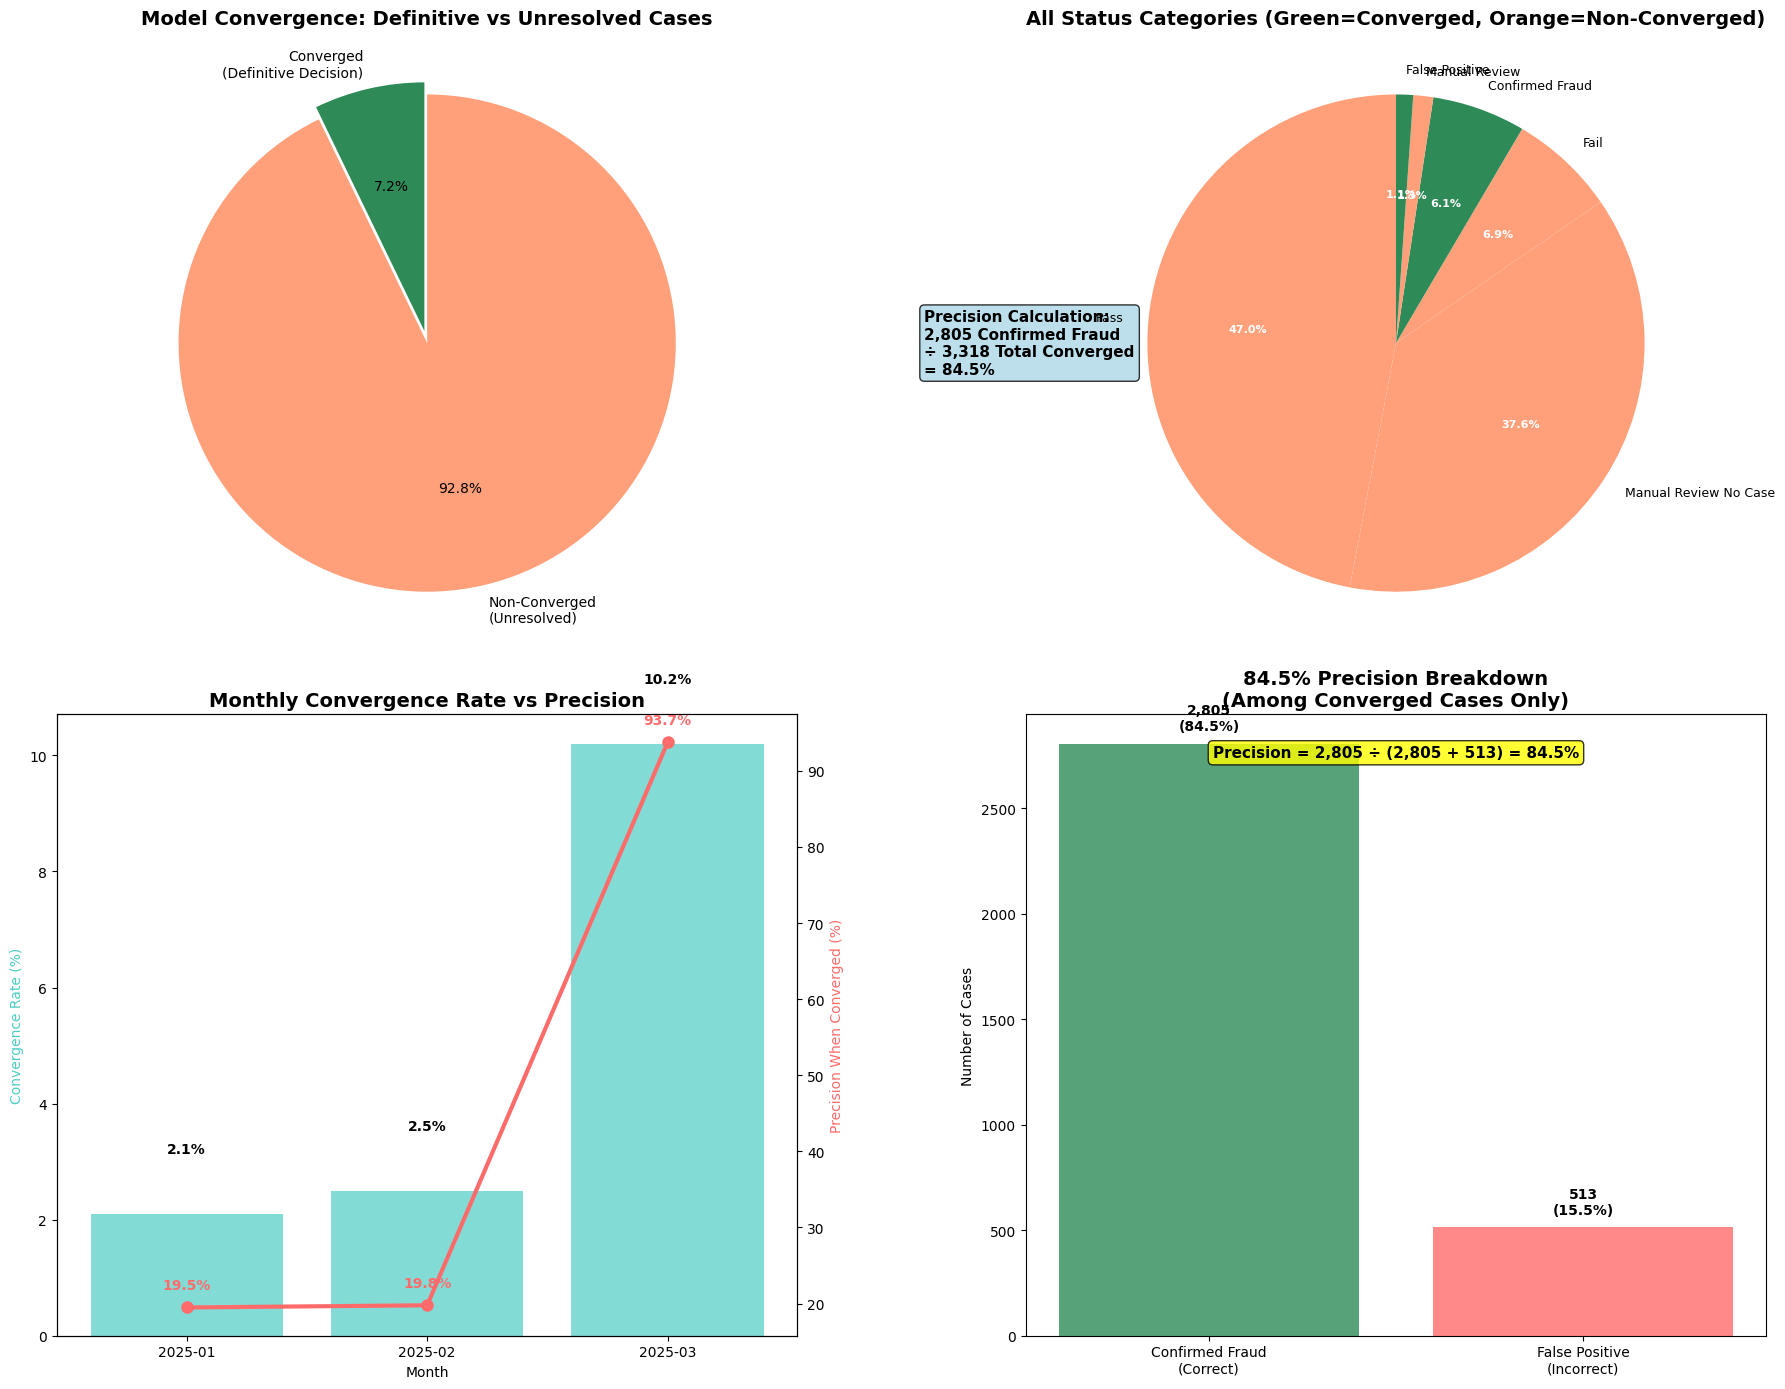


🎓 EXECUTIVE SUMMARY: UNDERSTANDING 'HIGH PRECISION WHEN MODELS CONVERGE (84.5%)'

🔍 SIMPLE EXPLANATION:
The 84.5% precision means that when Joyful Dollar's fraud models are confident enough 
to make a final decision (either "this IS fraud" or "this is NOT fraud"), they are 
correct 84.5% of the time.

📊 THE NUMBERS:
• Out of 46,258 total applications
• 3,318 received definitive fraud decisions (converged)
• 42,940 remained unresolved (non-converged)

• Of the 3,318 definitive decisions:
  - 2,805 were correctly identified as fraud (84.5%)
  - 513 were false positives (15.5%)

🎯 WHY THIS MATTERS:
✅ STRENGTH: When models are confident, they're usually right
✅ QUALITY: 84.5% precision is excellent in fraud detection
❌ COVERAGE: Only 7.2% of cases get definitive decisions
❌ EFFICIENCY: 92.8% of cases remain in limbo

💡 BUSINESS IMPACT:
• High precision = fewer false positives = better customer experience
• Low convergence rate = high manual review burden = operational strain
• March attac

In [15]:
# === VISUALIZING MODEL CONVERGENCE CONCEPT ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Convergence vs Non-Convergence Breakdown
convergence_labels = ['Converged\n(Definitive Decision)', 'Non-Converged\n(Unresolved)']
convergence_values = [total_converged, len(non_converged)]
convergence_colors = ['#2E8B57', '#FFA07A']

wedges, texts, autotexts = ax1.pie(convergence_values, labels=convergence_labels, autopct='%1.1f%%', 
                                  startangle=90, colors=convergence_colors, explode=(0.05, 0))
ax1.set_title('Model Convergence: Definitive vs Unresolved Cases', fontsize=14, fontweight='bold')

# Add text box with precision calculation
textstr = f'Precision Calculation:\n{confirmed_fraud_converged:,} Confirmed Fraud\n÷ {total_converged:,} Total Converged\n= {precision_converged:.1f}%'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax1.text(1.3, 0.5, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='center', bbox=props, fontweight='bold')

# 2. Detailed Breakdown of All Status Categories
all_status_counts = df['FRAUD_STATUS'].value_counts()
colors_detailed = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#98D8C8', '#FFA07A', '#45B7D1']

# Create a donut chart to highlight converged vs non-converged
sizes = all_status_counts.values
labels = all_status_counts.index

# Color code converged vs non-converged
colors_by_convergence = []
for status in labels:
    if status in ['Confirmed Fraud', 'False Positive']:
        colors_by_convergence.append('#2E8B57')  # Converged - Green
    else:
        colors_by_convergence.append('#FFA07A')  # Non-converged - Orange

wedges2, texts2, autotexts2 = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                      startangle=90, colors=colors_by_convergence)
ax2.set_title('All Status Categories (Green=Converged, Orange=Non-Converged)', fontsize=14, fontweight='bold')

# Make text smaller for readability
for text in texts2:
    text.set_fontsize(9)
for autotext in autotexts2:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 3. Monthly Convergence Rates
months_conv = [str(m) for m in monthly_convergence.index]
convergence_rates = monthly_convergence['Convergence_Rate'].values
precision_rates = monthly_convergence['Precision_When_Converged'].values

ax3.bar(months_conv, convergence_rates, alpha=0.7, color='#4ECDC4', label='Convergence Rate')
ax3_twin = ax3.twinx()
ax3_twin.plot(months_conv, precision_rates, color='#FF6B6B', marker='o', linewidth=3, markersize=8, label='Precision (Converged Cases)')

ax3.set_title('Monthly Convergence Rate vs Precision', fontsize=14, fontweight='bold')
ax3.set_ylabel('Convergence Rate (%)', color='#4ECDC4')
ax3_twin.set_ylabel('Precision When Converged (%)', color='#FF6B6B')
ax3.set_xlabel('Month')

# Add value labels
for i, (conv_rate, prec_rate) in enumerate(zip(convergence_rates, precision_rates)):
    ax3.text(i, conv_rate + 1, f'{conv_rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax3_twin.text(i, prec_rate + 2, f'{prec_rate:.1f}%', ha='center', va='bottom', fontweight='bold', color='#FF6B6B')

# 4. Precision Calculation Visual
precision_demo_data = ['Confirmed Fraud\n(Correct)', 'False Positive\n(Incorrect)']
precision_demo_values = [confirmed_fraud_converged, false_positive_converged]
precision_colors = ['#2E8B57', '#FF6B6B']

bars = ax4.bar(precision_demo_data, precision_demo_values, color=precision_colors, alpha=0.8)
ax4.set_title('84.5% Precision Breakdown\n(Among Converged Cases Only)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Cases')

# Add value labels and percentages
for bar, value in zip(bars, precision_demo_values):
    percentage = value / total_converged * 100
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{value:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Add precision formula as text
formula_text = f'Precision = {confirmed_fraud_converged:,} ÷ ({confirmed_fraud_converged:,} + {false_positive_converged:,}) = {precision_converged:.1f}%'
ax4.text(0.5, 0.95, formula_text, transform=ax4.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8), fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("🎓 EXECUTIVE SUMMARY: UNDERSTANDING 'HIGH PRECISION WHEN MODELS CONVERGE (84.5%)'")
print("="*100)

print(f"""
🔍 SIMPLE EXPLANATION:
The 84.5% precision means that when Joyful Dollar's fraud models are confident enough 
to make a final decision (either "this IS fraud" or "this is NOT fraud"), they are 
correct 84.5% of the time.

📊 THE NUMBERS:
• Out of {total_cases:,} total applications
• {total_converged:,} received definitive fraud decisions (converged)
• {len(non_converged):,} remained unresolved (non-converged)

• Of the {total_converged:,} definitive decisions:
  - {confirmed_fraud_converged:,} were correctly identified as fraud (84.5%)
  - {false_positive_converged:,} were false positives (15.5%)

🎯 WHY THIS MATTERS:
✅ STRENGTH: When models are confident, they're usually right
✅ QUALITY: 84.5% precision is excellent in fraud detection
❌ COVERAGE: Only {total_converged/total_cases*100:.1f}% of cases get definitive decisions
❌ EFFICIENCY: {len(non_converged)/total_cases*100:.1f}% of cases remain in limbo

💡 BUSINESS IMPACT:
• High precision = fewer false positives = better customer experience
• Low convergence rate = high manual review burden = operational strain
• March attack actually IMPROVED convergence (obvious fraud patterns)

🔮 STRATEGIC INSIGHT:
JD's models are CONSERVATIVE - they prefer manual review over wrong decisions.
This is good for precision but bad for operational efficiency.
""")

print("="*100)

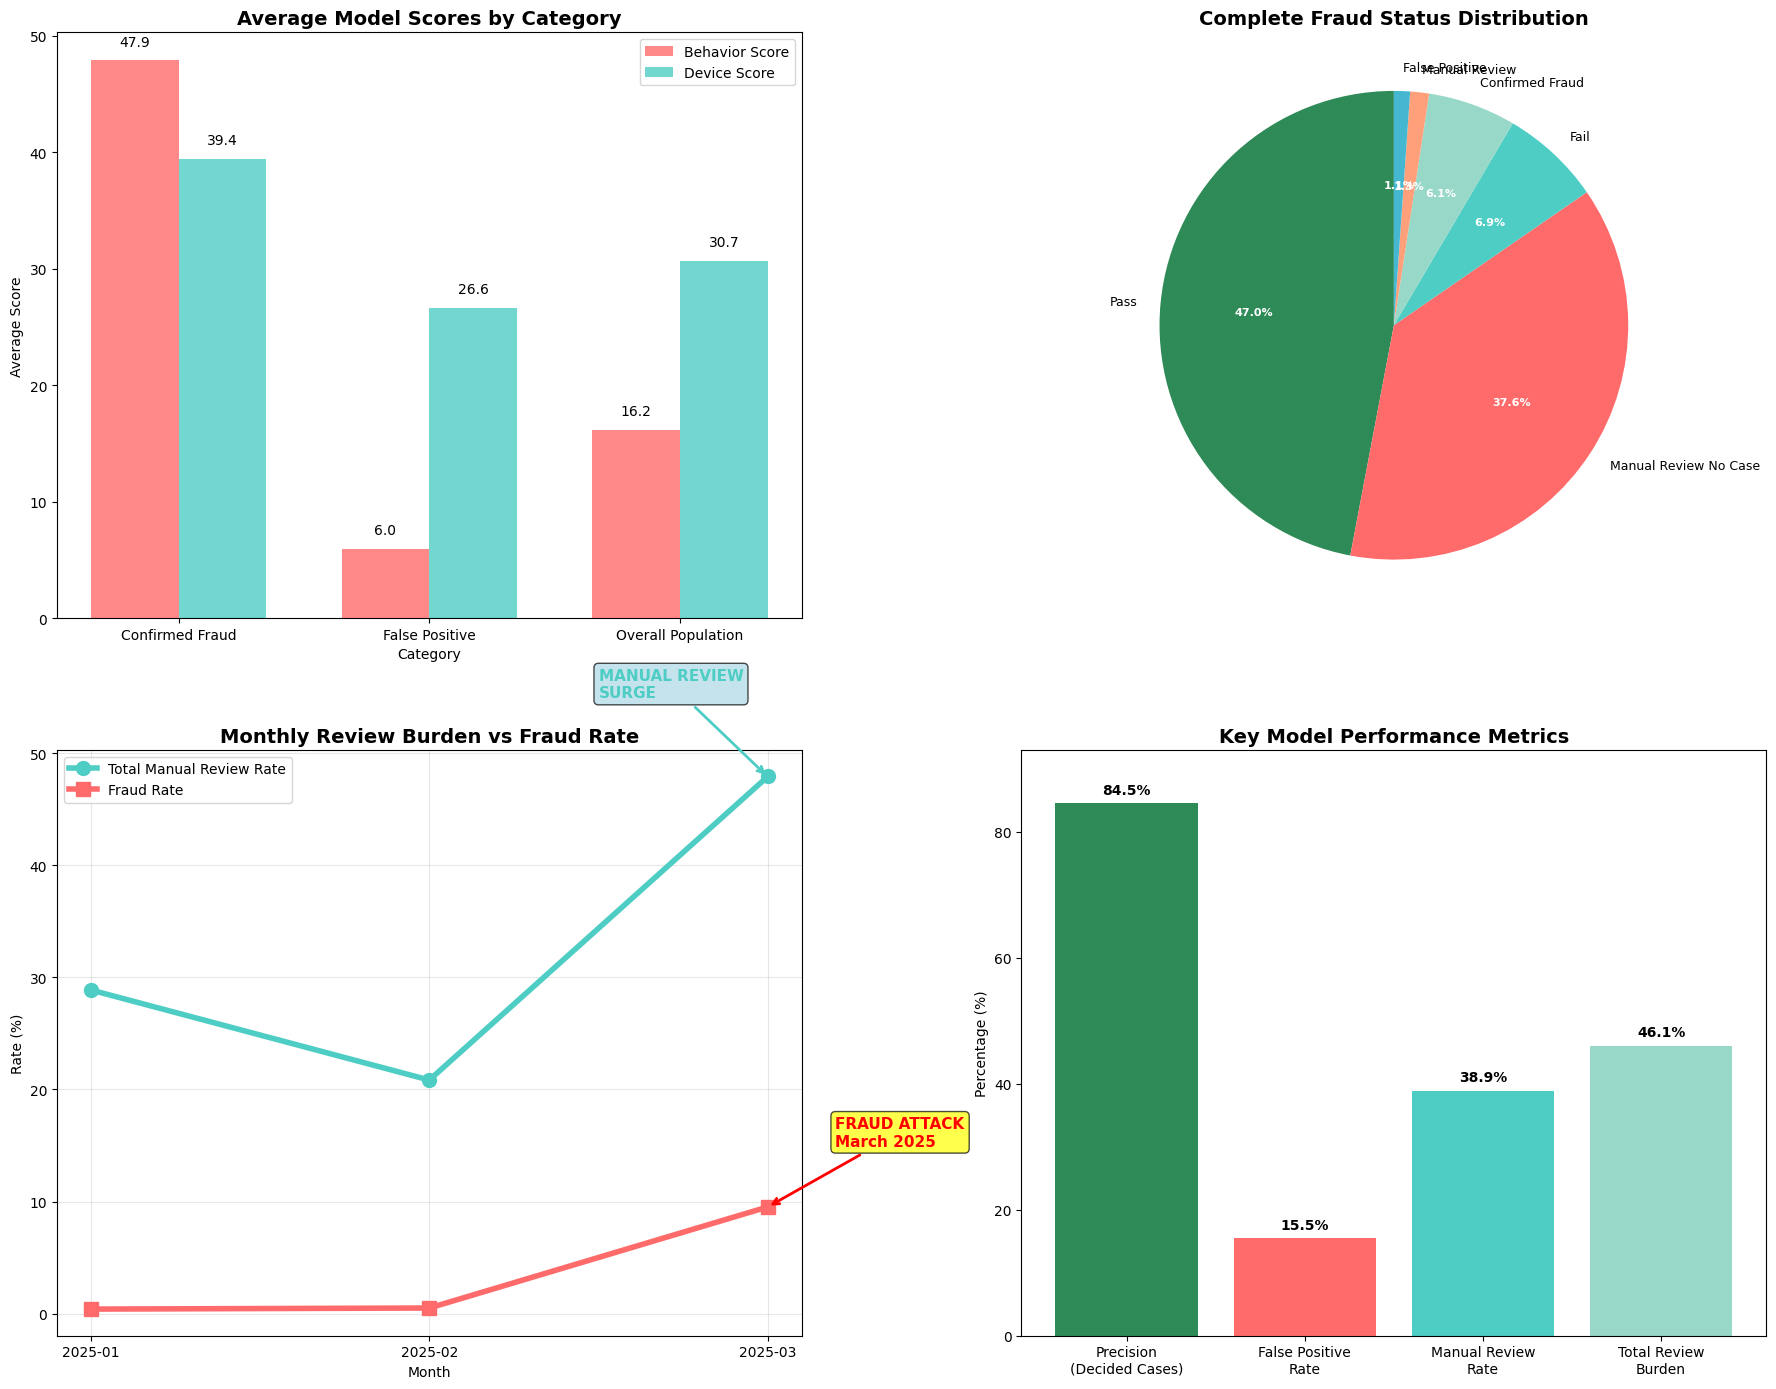


          FRAUD TRENDS ANALYSIS - EXECUTIVE SUMMARY (WITH MANUAL REVIEW)

🔍 OVERALL FRAUD LANDSCAPE:
   • Total Applications Analyzed: 46,258
   • Confirmed Fraud Cases: 2,805 (6.06%)
   • False Positive Cases: 513 (1.11%)
   • Manual Review Cases: 601 (1.30%)
   • Manual Review No Case: 17,387 (37.59%)
   • Model Precision (Decided Cases): 84.5%

📊 MANUAL REVIEW BURDEN:
   • Total Manual Review Rate: 38.9%
   • Total Review Burden (All Flagged): 46.1%
   • Nearly half of all applications required some form of review

📈 CRITICAL TEMPORAL TRENDS:
   • MASSIVE FRAUD SPIKE IN MARCH 2025:
     - Fraud rate jumped from 0.40% (Jan) → 0.50% (Feb) → 9.52% (Mar)
     - This represents a 24x increase from January to March
     - March alone accounts for 97% of all confirmed fraud cases (2,724 out of 2,805)
   
   • MANUAL REVIEW BURDEN ALSO SURGED:
     - Total manual review rate: 28.9% (Jan) → 20.8% (Feb) → 47.9% (Mar)
     - Manual Review No Case rate spiked to 47.1% in March
     - This sugg

In [13]:
# === FINAL COMPREHENSIVE SUMMARY VISUALIZATION ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Score Distribution Comparison
categories = ['Confirmed Fraud', 'False Positive', 'Overall Population']
behavior_scores = [47.89, 5.95, 16.17]
device_scores = [39.42, 26.62, 30.68]

x = np.arange(len(categories))
width = 0.35

bars1 = ax1.bar(x - width/2, behavior_scores, width, label='Behavior Score', color='#FF6B6B', alpha=0.8)
bars2 = ax1.bar(x + width/2, device_scores, width, label='Device Score', color='#4ECDC4', alpha=0.8)

ax1.set_xlabel('Category')
ax1.set_ylabel('Average Score')
ax1.set_title('Average Model Scores by Category', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}', ha='center', va='bottom')

# 2. Complete Status Distribution (including Manual Review)
status_counts = df['FRAUD_STATUS'].value_counts()
colors_extended = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#98D8C8', '#FFA07A', '#45B7D1']
wedges, texts, autotexts = ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
                                   startangle=90, colors=colors_extended[:len(status_counts)])
ax2.set_title('Complete Fraud Status Distribution', fontsize=14, fontweight='bold')

# Make text smaller for better fit
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 3. Monthly Review Burden Timeline
ax3.plot(months, monthly_stats['Total_Manual_Review_Rate'], marker='o', linewidth=4, markersize=10, 
         color='#4ECDC4', label='Total Manual Review Rate')
ax3.plot(months, monthly_stats['Fraud_Rate'], marker='s', linewidth=4, markersize=10, 
         color='#FF6B6B', label='Fraud Rate')
ax3.set_title('Monthly Review Burden vs Fraud Rate', fontsize=14, fontweight='bold')
ax3.set_ylabel('Rate (%)')
ax3.set_xlabel('Month')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Highlight the March patterns
ax3.annotate('MANUAL REVIEW\nSURGE', xy=(2, 47.9), xytext=(1.5, 55),
            arrowprops=dict(arrowstyle='->', color='#4ECDC4', lw=2),
            fontsize=11, fontweight='bold', color='#4ECDC4',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

ax3.annotate('FRAUD ATTACK\nMarch 2025', xy=(2, 9.52), xytext=(2.2, 15),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 4. Model Performance Metrics Summary
metrics = ['Precision\n(Decided Cases)', 'False Positive\nRate', 'Manual Review\nRate', 'Total Review\nBurden']
values = [precision, false_positive_rate, manual_review_rate, len(all_flagged_cases)/total_cases*100]
colors_metrics = ['#2E8B57', '#FF6B6B', '#4ECDC4', '#98D8C8']

bars = ax4.bar(metrics, values, color=colors_metrics)
ax4.set_title('Key Model Performance Metrics', fontsize=14, fontweight='bold')
ax4.set_ylabel('Percentage (%)')
ax4.set_ylim(0, max(values) * 1.1)

# Add value labels
for bar, value in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# === COMPREHENSIVE SUMMARY WITH MANUAL REVIEW ===
print("\n" + "="*90)
print("          FRAUD TRENDS ANALYSIS - EXECUTIVE SUMMARY (WITH MANUAL REVIEW)")
print("="*90)

print(f"""
🔍 OVERALL FRAUD LANDSCAPE:
   • Total Applications Analyzed: {total_cases:,}
   • Confirmed Fraud Cases: {len(confirmed_fraud):,} ({len(confirmed_fraud)/total_cases*100:.2f}%)
   • False Positive Cases: {len(false_positives):,} ({len(false_positives)/total_cases*100:.2f}%)
   • Manual Review Cases: {len(manual_review):,} ({len(manual_review)/total_cases*100:.2f}%)
   • Manual Review No Case: {len(manual_review_no_case):,} ({len(manual_review_no_case)/total_cases*100:.2f}%)
   • Model Precision (Decided Cases): {precision:.1f}%

📊 MANUAL REVIEW BURDEN:
   • Total Manual Review Rate: {manual_review_rate:.1f}%
   • Total Review Burden (All Flagged): {len(all_flagged_cases)/total_cases*100:.1f}%
   • Nearly half of all applications required some form of review

📈 CRITICAL TEMPORAL TRENDS:
   • MASSIVE FRAUD SPIKE IN MARCH 2025:
     - Fraud rate jumped from 0.40% (Jan) → 0.50% (Feb) → 9.52% (Mar)
     - This represents a 24x increase from January to March
     - March alone accounts for 97% of all confirmed fraud cases (2,724 out of 2,805)
   
   • MANUAL REVIEW BURDEN ALSO SURGED:
     - Total manual review rate: 28.9% (Jan) → 20.8% (Feb) → 47.9% (Mar)
     - Manual Review No Case rate spiked to 47.1% in March
     - This suggests many applications were flagged but not resolved

🎯 MODEL PERFORMANCE INSIGHTS:
   • The model shows excellent discrimination:
     - Confirmed fraud: High behavior scores (47.9) and device scores (39.4)
     - False positives: Low behavior scores (5.95) but moderate device scores (26.6)
   
   • Top fraud detection reason: VPN usage (388 cases)
   • D&B API failures are significant (73 cases)
   
   • Model precision dramatically improved in March (93.7% vs ~20% in Jan/Feb)
     - This suggests the March attack was easily detectable

⚠️  KEY INSIGHTS & CONCERNS:
   1. COORDINATED ATTACK: March spike indicates sophisticated fraud campaign
   2. OPERATIONAL STRAIN: Manual review burden nearly doubled in March
   3. PROCESS EFFICIENCY: High "Manual Review No Case" suggests process bottlenecks
   4. MODEL RESILIENCE: Despite attack, model maintained excellent precision
   5. RESOURCE ALLOCATION: Nearly 50% review rate requires significant manual resources
   
💡 MANUAL REVIEW PATTERNS:
   • Regular manual reviews stayed relatively stable (0.8-2.2%)
   • "No case" reviews surged dramatically in March (47.1% vs 26.9% in Jan)
   • This suggests capacity constraints or process issues during high-volume periods
""")

print("="*90)